In [3]:
import pandas as pd
data = pd.read_csv("imdb-reviews_2.csv")
data.head()

,review,label
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [14]:
import re
# Count the number of positive and negative sentiment
sentiment_counts = data['review'].value_counts()
print("Sentiment Counts:")
print(sentiment_counts)

# Define a function to clean the text
def clean_text(text):
    # Remove HTML tags
    cleaned_text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

# Apply the clean_text function to the 'review' column
data['review_processed'] = data['review'].apply(clean_text)


print(data['review_processed'])
# Display the first few rows of the DataFrame
print("\nSample of Data with Processed Reviews:")
print(data.head())


Sentiment Counts:
review
movie surprised me. things "clicheish" technological elements reminded movie "Enemy State" starring Smith. part entertaining- good mix Jamie Foxx comedian Mike Epps 2 wannabe thugs Julio Ramundo (providing comic relief). movie watch again-say... Wednesday night nothing else on. gave 9 entertainment value.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#Replace short words
data['review_processed'] = data['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
# Make entire text lowercase
data['review_processed'] = data['review_processed'].apply(lambda x: x.lower())
# Remove stopwords
stop_words = set(stopwords.words('english'))
data['review_processed'] = data['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
# Custom list of words to be removed
custom_words = set(['movie', 'film', 'one', 'make', 'even'])
data['review_processed'] = data['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in custom_words]))

lemmatizer = WordNetLemmatizer()

# Function to convert NLTK tags into WordNet tags
def nltk_to_wordnet_pos(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None  # for words without available tags

# Function to lemmatize sentences using POS tagging
def lemmatize_sentence(sentence):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)
    # Get part-of-speech tags for each token
    pos_tags = nltk.pos_tag(tokens)
    # Lemmatize each token using its POS tag
    wordnet_tagged = []
    for token, tag in pos_tags:
        wordnet_tag = nltk_to_wordnet_pos(tag)
        if wordnet_tag is None:
            # If there is no available tag, append the token as is
            wordnet_tagged.append(token)
        else:
            # Use the tag to lemmatize the token
            lemma = lemmatizer.lemmatize(token, pos=wordnet_tag)
            wordnet_tagged.append(lemma)
    return ' '.join(wordnet_tagged)

# Apply lemmatization with POS tagging to the 'review_processed' column
data['review_processed'] = data['review_processed'].apply(lemmatize_sentence)
# Display the first few rows of the DataFrame
print("\nSample of Data with Processed Reviews:")
print(data.head())


Sample of Data with Processed Reviews:
                                              review  label  \
0  first think another Disney movie, might good, ...      1   
1  Put aside Dr. House repeat missed, Desperate H...      0   
2  big fan Stephen King's work, film made even gr...      1   
3  watched horrid thing TV. Needless say one movi...      0   
4  truly enjoyed film. acting terrific plot. Jeff...      1   

                                    review_processed  
0  first think another disney might good kid watc...  
1  put aside house repeat miss desperate housewif...  
2  big fan stephen king work make great fan king ...  
3  watch horrid thing needless say movie watch se...  
4  truly enjoyed act terrific plot jeff combs tal...  


                                                 review  label  \
1     Put aside Dr. House repeat missed, Desperate H...      0   
3     watched horrid thing TV. Needless say one movi...      0   
6     Shakespeare fan, appreciate Ken Branagh done b...      0   
10    strange sex comedy there`s little comedy whole...      0   
11    many problems film, worst continuity; re-editi...      0   
...                                                 ...    ...   
4993  ...which isn't exactly ringing endorsement. Ov...      0   
4994  worst movie ever seen. Everyone involved embar...      0   
4996  review applies cut film that's generally avail...      0   
4997  There's little get excited "Dan Real Life". Fi...      0   
4999  sooooo excited see movie finally reading book ...      0   

                                       review_processed  
1     put aside house repeat miss desperate housewif...  
3     watch horrid thing needless say movie watch se...  
6     shakespeare fan appreciate 

/var/folders/d6/3lmd4zxn7ds0t2q9qc7xgmh00000gn/T/ipykernel_33264/612053232.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['review_processed'] = positive_reviews['review'].apply(clean_text)
/var/folders/d6/3lmd4zxn7ds0t2q9qc7xgmh00000gn/T/ipykernel_33264/612053232.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['review_processed'] = positive_reviews['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


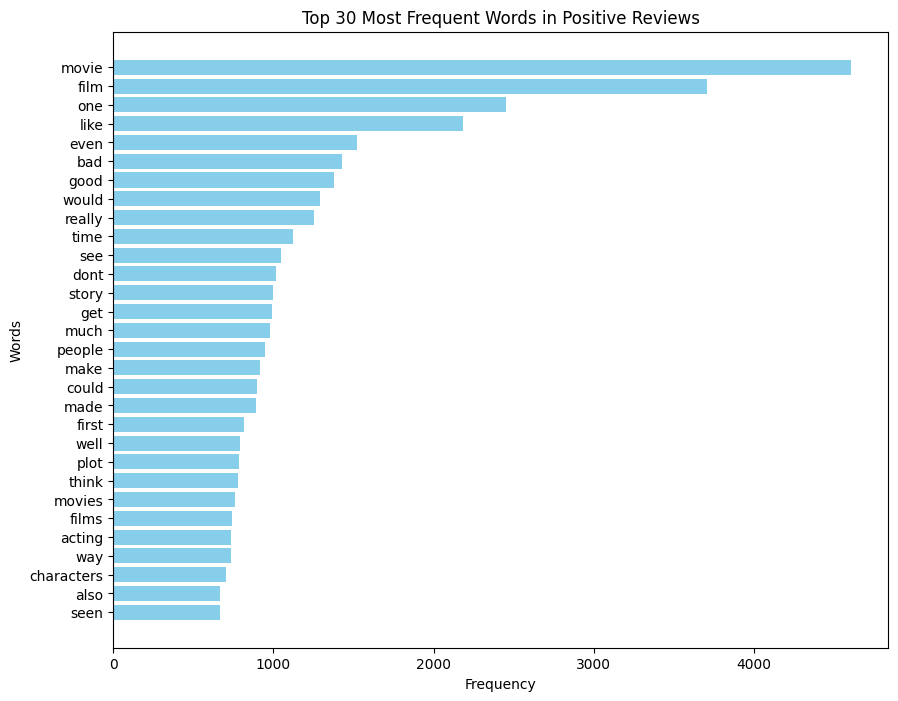

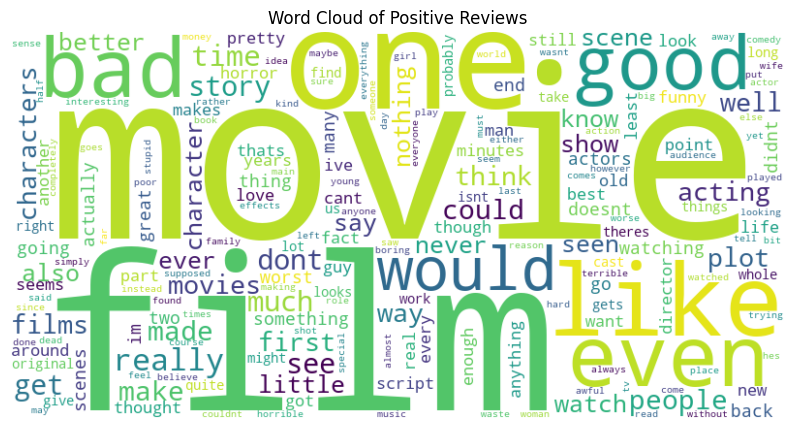

In [22]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

positive_reviews = data[data['label'] == 0]

print(positive_reviews)
# Define a function to clean the text
def clean_text(text):
    # Remove HTML tags
    cleaned_text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', cleaned_text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

# Apply the clean_text function to the 'review' column
positive_reviews['review_processed'] = positive_reviews['review'].apply(clean_text)
# Remove stopwords
stop_words = set(stopwords.words('english'))
positive_reviews['review_processed'] = positive_reviews['review_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Extract words into list and count frequency
all_words = ' '.join(positive_reviews['review_processed']).split()
word_freq = Counter(all_words)

# Subset top 30 words by frequency
top_words = word_freq.most_common(30)
top_words_df = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plot the top 30 words in a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(top_words_df['Word'], top_words_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words in Positive Reviews')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word at the top
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = data['review']
y = data['label']

# Initialize CountVectorizer to create a sparse matrix of 2,500 tokens
vectorizer = CountVectorizer(max_features=2500)

# Fit and transform the data
X_sparse = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Initialize and train the GaussianNB model
model = GaussianNB()
model.fit(X_train.toarray(), y_train)

# Predict on the test set
y_pred = model.predict(X_test.toarray())

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the GaussianNB model:", accuracy)

Accuracy of the GaussianNB model: 0.754


Accuracy of the GaussianNB model: 0.754
Confusion Matrix:
[[394  85]
 [161 360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       479
           1       0.81      0.69      0.75       521

    accuracy                           0.75      1000
   macro avg       0.76      0.76      0.75      1000
weighted avg       0.76      0.75      0.75      1000



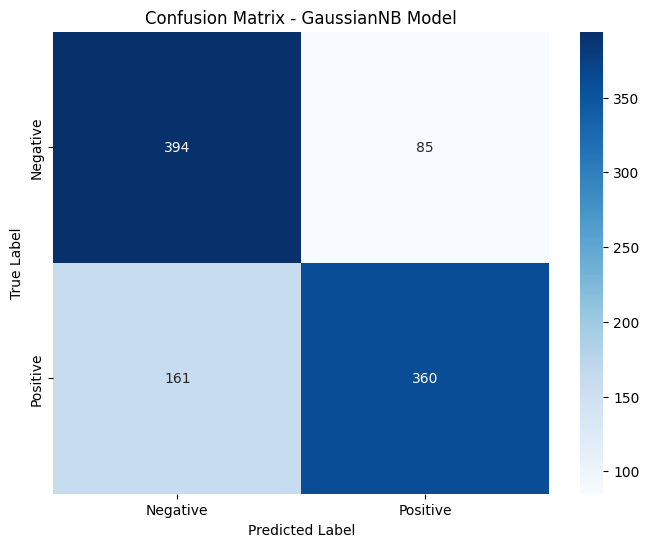

Accuracy of Logistic Regression model (C=0.01): 0.853
Accuracy of Logistic Regression model (C=0.05): 0.86
Accuracy of Logistic Regression model (C=0.5): 0.851
Accuracy of Logistic Regression model (C=1): 0.844
Area under the ROC curve: 0.9078895171081789


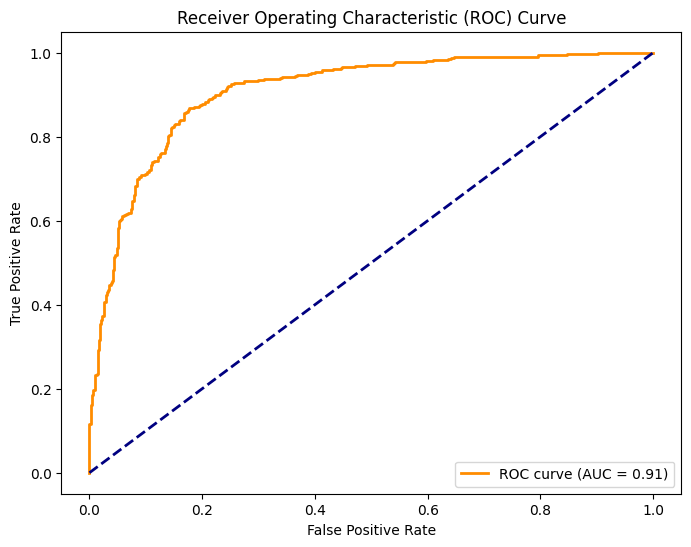

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

vectorizer = CountVectorizer(max_features=2500)

# Fit and transform the data
X_sparse = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42)

# Initialize and train the GaussianNB model
model_nb = GaussianNB()
model_nb.fit(X_train.toarray(), y_train)

# Predict on the test set
y_pred_nb = model_nb.predict(X_test.toarray())

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of the GaussianNB model:", accuracy_nb)

# Confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix_nb)

# Classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:")
print(class_report_nb)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - GaussianNB Model')
plt.show()

# Initialize and train logistic regression models for different values of C
C_values = [0.01, 0.05, 0.5, 1]
for C in C_values:
    model_lr = LogisticRegression(C=C, max_iter=1000)
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    print("Accuracy of Logistic Regression model (C={}): {}".format(C, accuracy_lr))

# Compute ROC curve and AUC for the logistic regression model
fpr, tpr, thresholds = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()